<a href="https://colab.research.google.com/github/2BARAM/jejumaster/blob/main/%EA%B3%BC%EC%A0%9C1_%EC%9D%B4%EB%AF%B8%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **과제1_이미경**#

## 우울감을 경험한 고등학생은 얼마나 될까?  (년도별 조사) ##

In [63]:
!pip install pandas

In [64]:
!pip install numpy

In [65]:
!pip install matplotlib

In [66]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 데이터 다운로드 ##
-국가통계포털 사이트 : https://kosis.kr/index/index.do

-다운로드 : 우울감_경험률_20231104042342.csv

In [67]:
PATH = './sample_data/'
FILE = '우울감_경험률_20231104042342.csv'

In [68]:
import pandas as pd

PATH = './sample_data/'
FILE = '우울감_경험률_20231104042342.csv'

file =PATH+FILE
df =pd.read_csv(file, encoding='utf-8')
df
# df.head(100)

,응답자특성별(1),응답자특성별(2),시점,전체
0,응답자특성별(1),응답자특성별(2),시점,분석대상자수 (명)
1,학교급별,중학교,2013,36530
2,학교급별,중학교,2014,36156
3,학교급별,중학교,2015,34299
4,학교급별,중학교,2016,32219
...,...,...,...,...
186,지역별,제주,2018,1452
187,지역별,제주,2019,1283
188,지역별,제주,2020,1396
189,지역별,제주,2021,1375


In [69]:
!pip install missingno

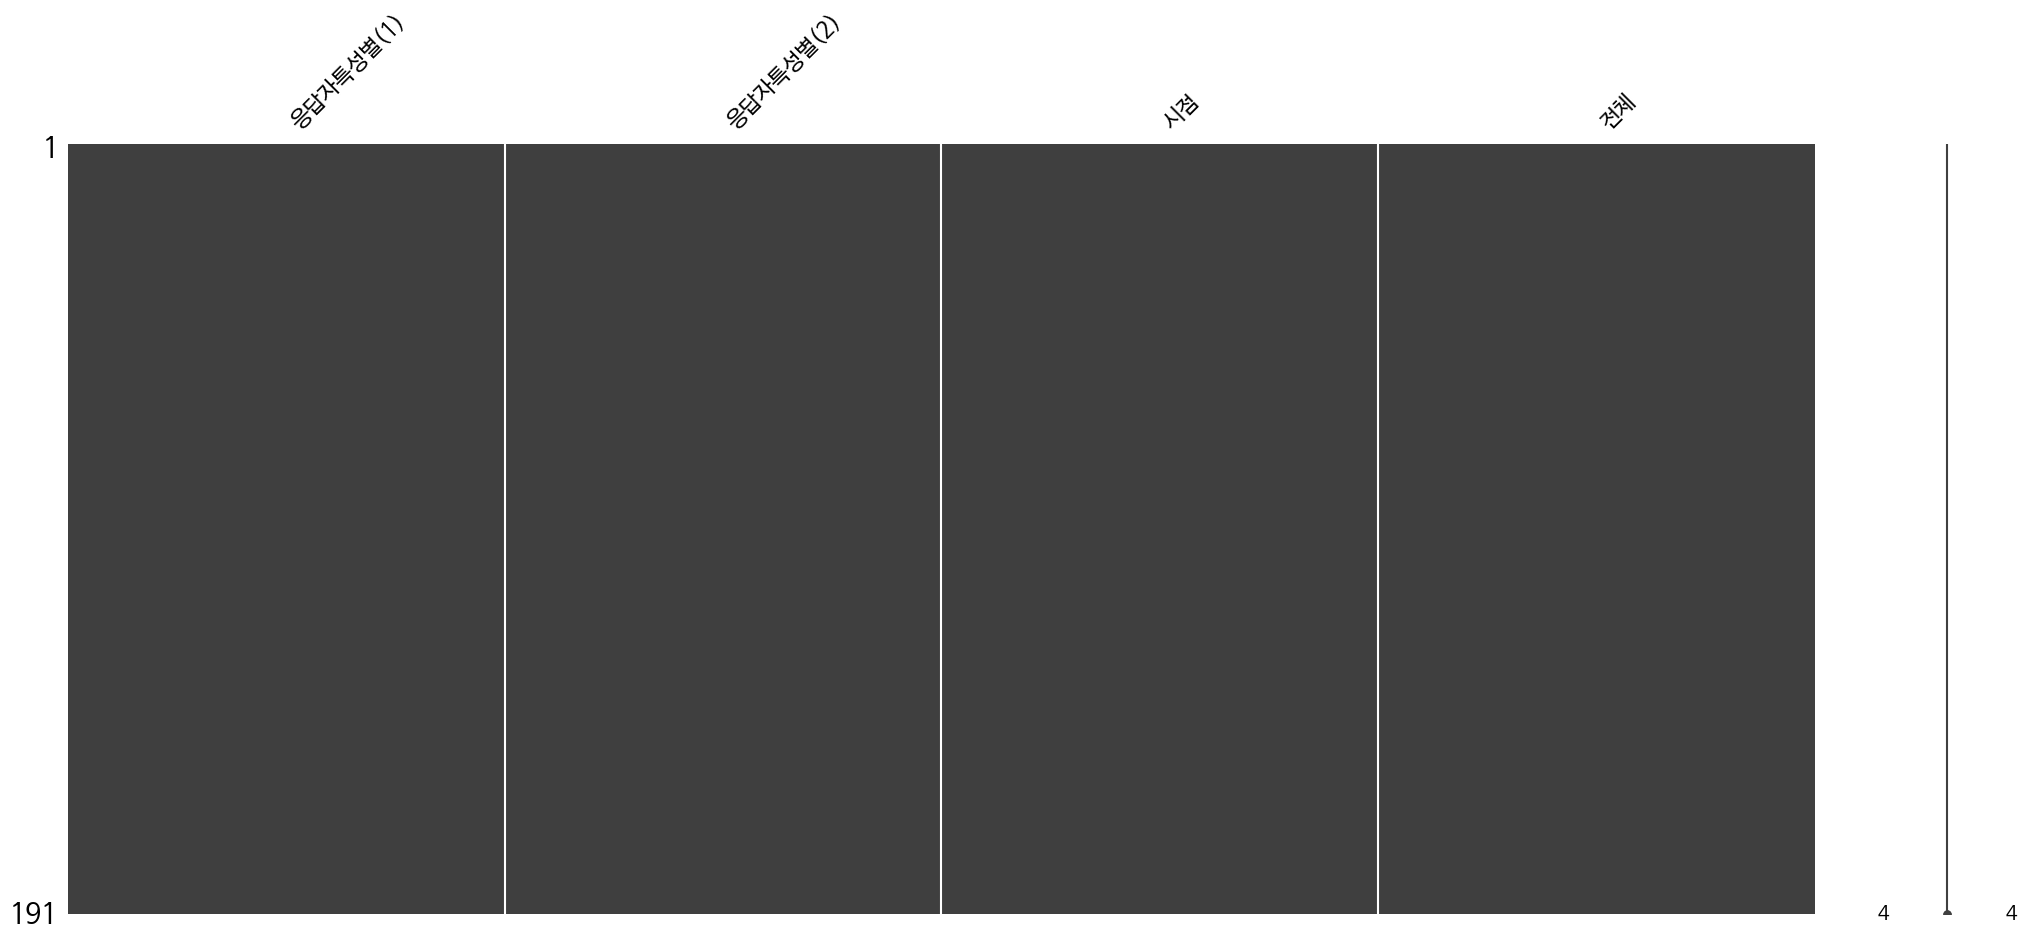

In [70]:
import missingno as msno
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

msno.matrix(df)
plt.show()

In [71]:
df.columns

Index(['응답자특성별(1)', '응답자특성별(2)', '시점', '전체'], dtype='object')

In [72]:
df.columns=['특성1','대상', '년도', '경험자수']
df.columns

Index(['특성1', '대상', '년도', '경험자수'], dtype='object')

In [73]:
df

,특성1,대상,년도,경험자수
0,응답자특성별(1),응답자특성별(2),시점,분석대상자수 (명)
1,학교급별,중학교,2013,36530
2,학교급별,중학교,2014,36156
3,학교급별,중학교,2015,34299
4,학교급별,중학교,2016,32219
...,...,...,...,...
186,지역별,제주,2018,1452
187,지역별,제주,2019,1283
188,지역별,제주,2020,1396
189,지역별,제주,2021,1375


In [74]:
df.drop('특성1', axis=1, inplace=True)
df.head(2)

,대상,년도,경험자수
0,응답자특성별(2),시점,분석대상자수 (명)
1,중학교,2013,36530


In [75]:
len (set(df['년도']))

11

In [76]:
df['대상']

0      응답자특성별(2)
1            중학교
2            중학교
3            중학교
4            중학교
         ...    
186           제주
187           제주
188           제주
189           제주
190           제주
Name: 대상, Length: 191, dtype: object

In [77]:
df_student1= df[df['대상'].str.contains('고등학교')]
df_student1

,대상,년도,경험자수
11,고등학교,2013,35905
12,고등학교,2014,35904
13,고등학교,2015,33744
14,고등학교,2016,33309
15,고등학교,2017,31391
16,고등학교,2018,29811
17,고등학교,2019,27919
18,고등학교,2020,25987
19,고등학교,2021,24833
20,고등학교,2022,23835


In [79]:
df_student_group = df_student1.groupby('년도').sum(numeric_only=False)
df_student_group

,대상,경험자수
년도,,
2013,고등학교,35905
2014,고등학교,35904
2015,고등학교,33744
2016,고등학교,33309
2017,고등학교,31391
2018,고등학교,29811
2019,고등학교,27919
2020,고등학교,25987
2021,고등학교,24833


In [ ]:
#cvs 저장 출력하기

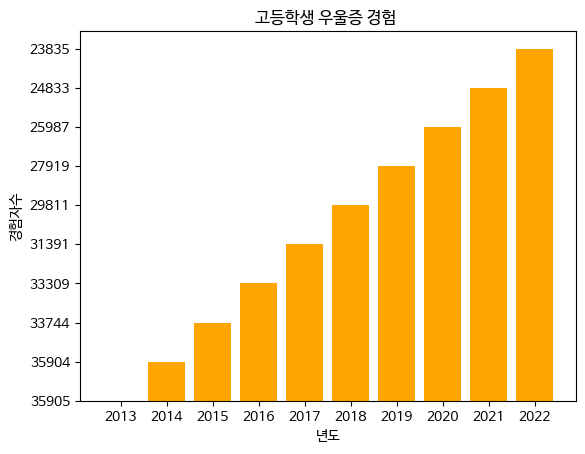

In [81]:
import matplotlib.pyplot as plt

# 코랩에서 한글 폰트 설치한 후 사용하기!!!
# plt.rc('font', family='cmb10')                  # (코랩)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_student_group.index     # 지역
y = df_student_group['경험자수']   # 인구수

# 2.그래프 그리기
plt.bar(x, y, color='orange')

# 3. 그래프 꾸미기
# plt.title('대한민국 "구씨"를 찾아라') # 그래프 제목
plt.title('고등학생 우울증 경험 ') # 그래프 제목
plt.xlabel('년도')                    # x축 이름
plt.ylabel('경험자수')                  # y축 이름
#plt.xticks(rotation = 45)             # X축 레이블 회전
plt.show()                            # 그래프 출력하기

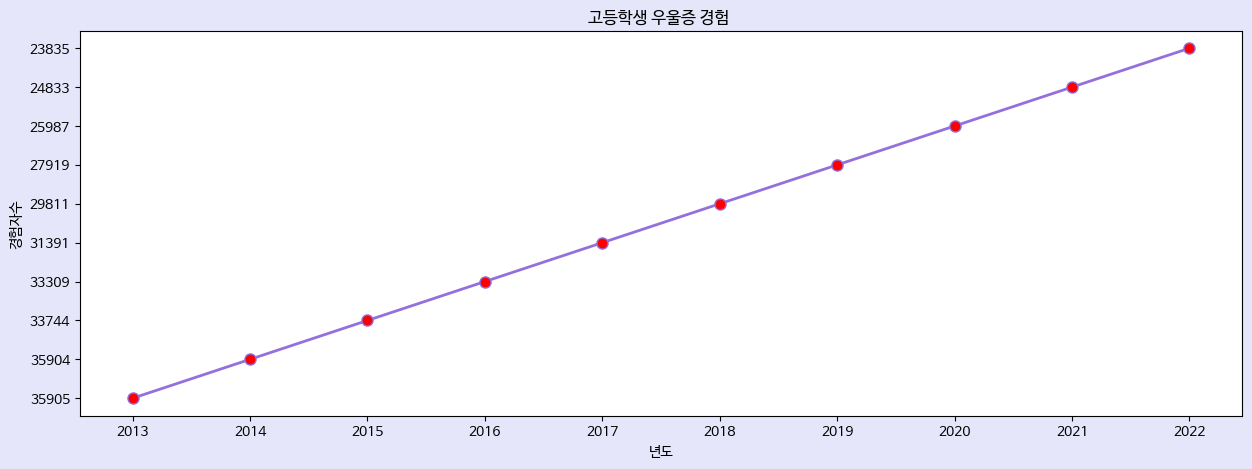

In [82]:
import matplotlib.pyplot as plt

# 코랩에서 한글 폰트 설치한 후 사용하기!!!
# plt.rc('font', family='cmb10')                  # (코랩)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_student_group.index     # 지역
y = df_student_group['경험자수']   # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.plot(x, y, color='mediumpurple', marker='o', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='red')

# 3. 그래프 꾸미기
# plt.title('대한민국 "구씨"를 찾아라') # 그래프 제목
plt.title('고등학생 우울증 경험 ') # 그래프 제목
plt.xlabel('년도')                    # x축 이름
plt.ylabel('경험자수')                  # y축 이름
#plt.xticks(rotation = 45)             # X축 레이블 회전
plt.show()                            # 그래프 출력하기

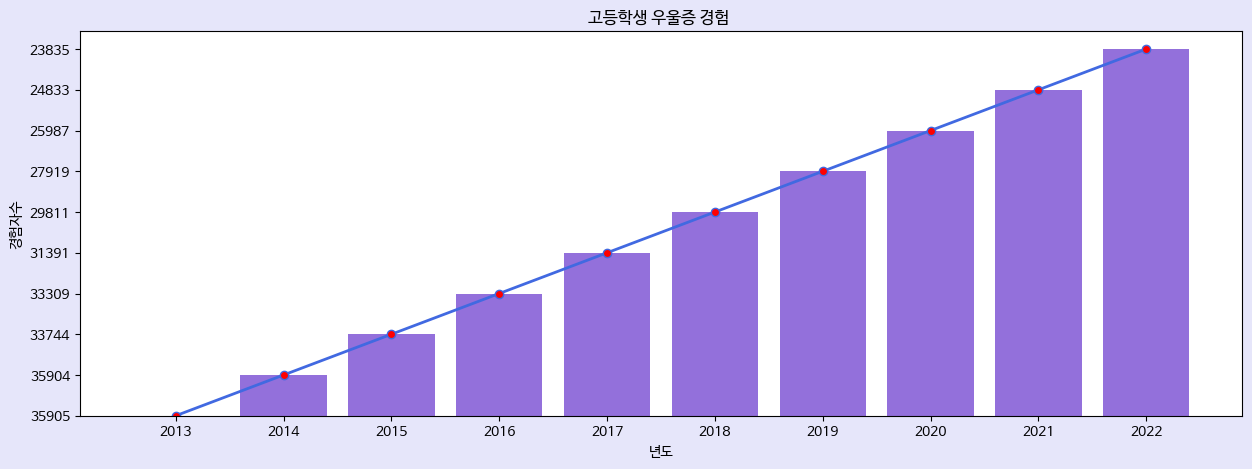

In [83]:
import matplotlib.pyplot as plt

# 코랩에서 한글 폰트 설치한 후 사용하기!!!
# plt.rc('font', family='cmb10')                  # (코랩)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_student_group.index     # 지역
y = df_student_group['경험자수']   # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')          # 막대 그래프
plt.plot(x, y, color='royalblue', marker='o',  # 선 그래프
         linewidth=2, markerfacecolor='red')

# 3. 그래프 꾸미기
# plt.title('대한민국 "구씨"를 찾아라') # 그래프 제목
plt.title('고등학생 우울증 경험 ') # 그래프 제목
plt.xlabel('년도')                    # x축 이름
plt.ylabel('경험자수')                  # y축 이름
#plt.xticks(rotation = 45)             # X축 레이블 회전
plt.show()                            # 그래프 출력하기

In [84]:
print('처음 이 데이터를 시작하고 계속 증가하고 내년에는 조금씩 내려가길')

처음 이 데이터를 시작하고 계속 증가하고 내년에는 조금씩 내려가길
